In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyts.image import RecurrencePlot, GramianAngularField, MarkovTransitionField

In [2]:
dados = pd.read_parquet("../data/TESTE2.parquet")

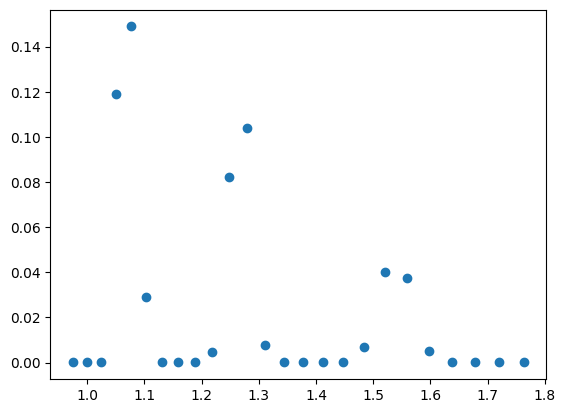

In [5]:
plt.scatter(dados["WAVELENGTH_SS-NIR"][0], dados["ALBEDO_SS-NIR"][0])

https://pyts.readthedocs.io/en/stable/modules/image.html

- Recurrence Plot: Mostra padrões repetitivos, destacando características que se repetem ao longo do comprimento de onda.

- Gramian Angular Field: Preserva as relações angulares entre pontos, útil para entender mudanças de fase ou transições suaves no albedo.

- Markov Transition Field: Representa as transições de intensidade, focando em como o albedo muda abruptamente ao longo do comprimento de onda.

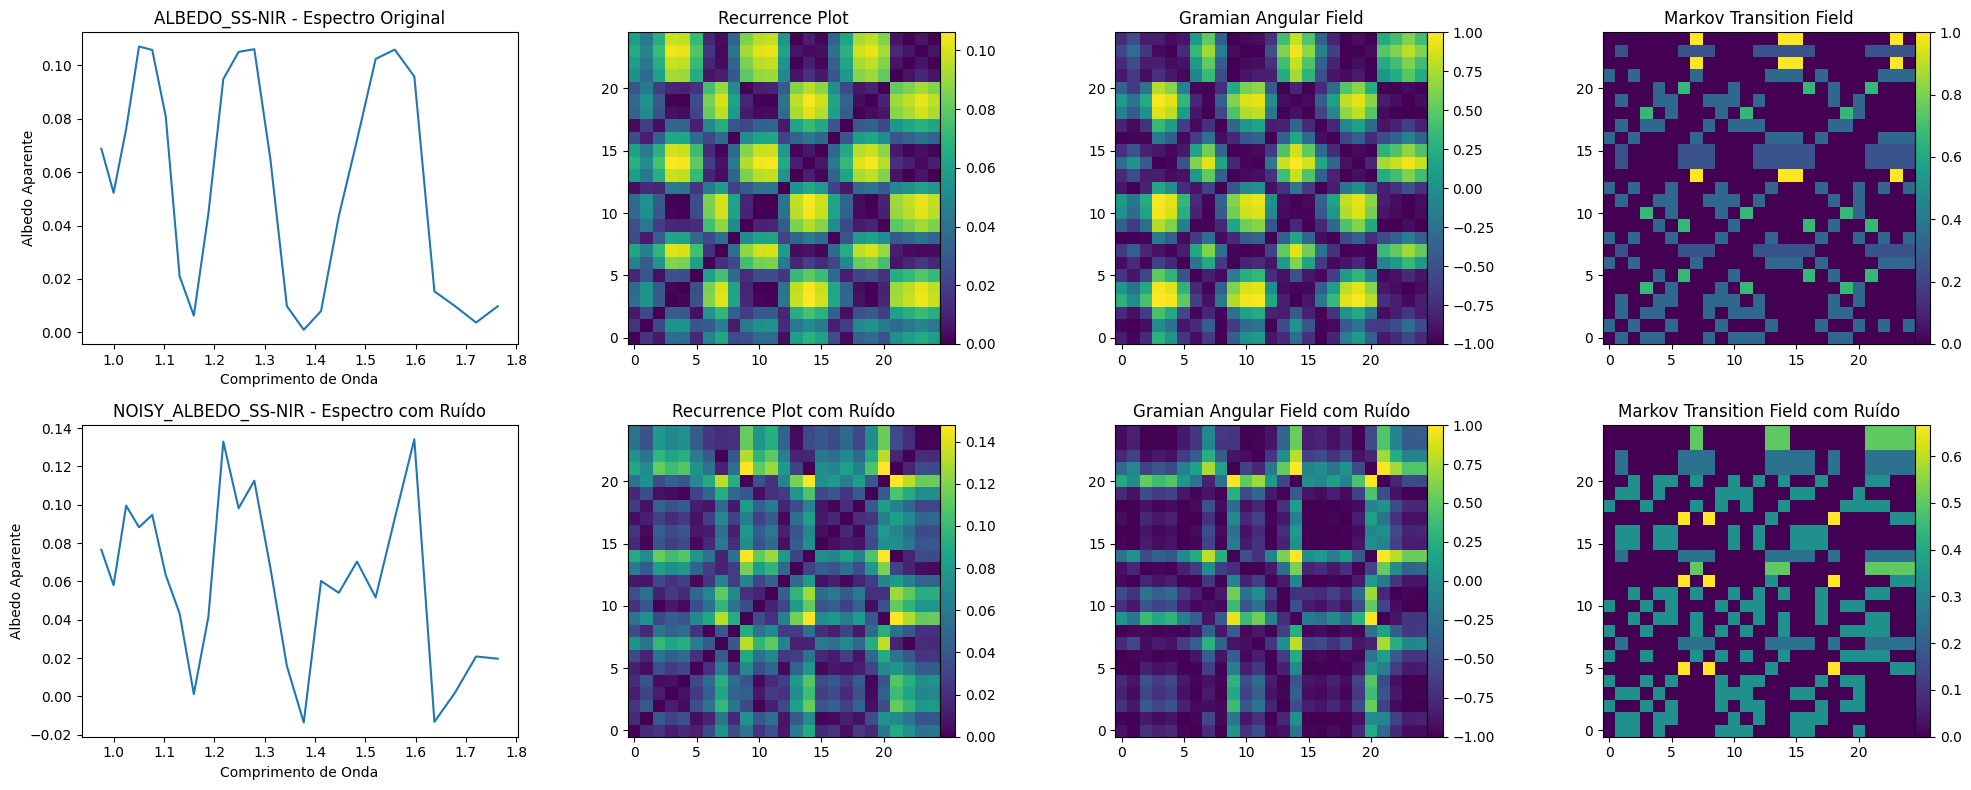

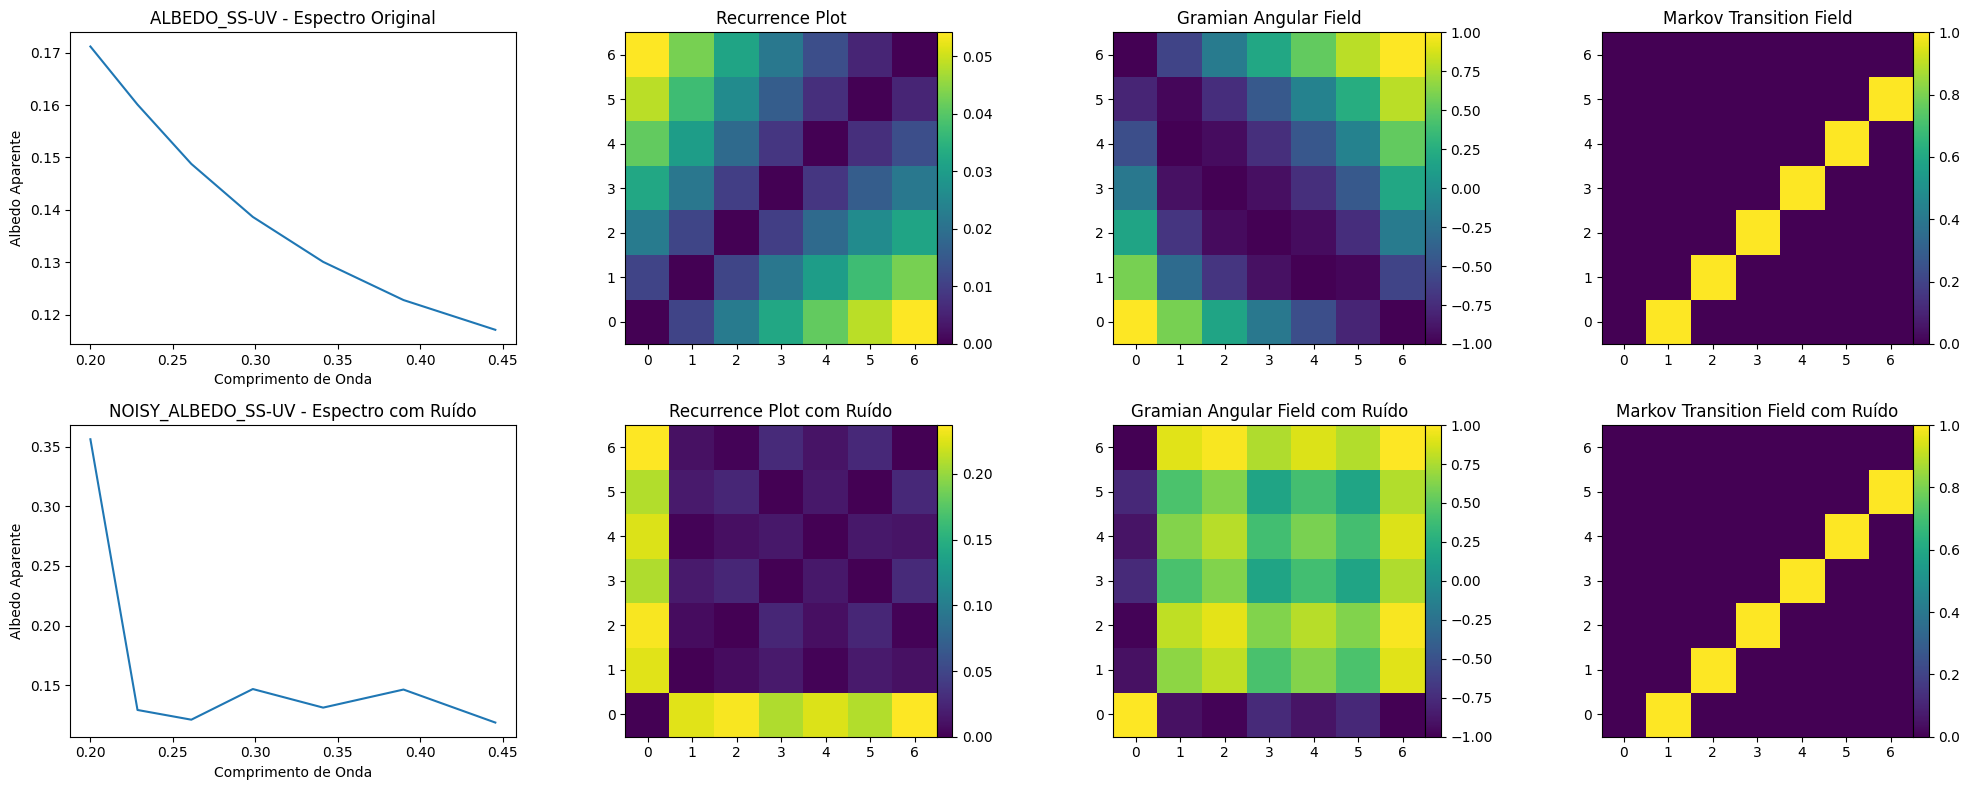

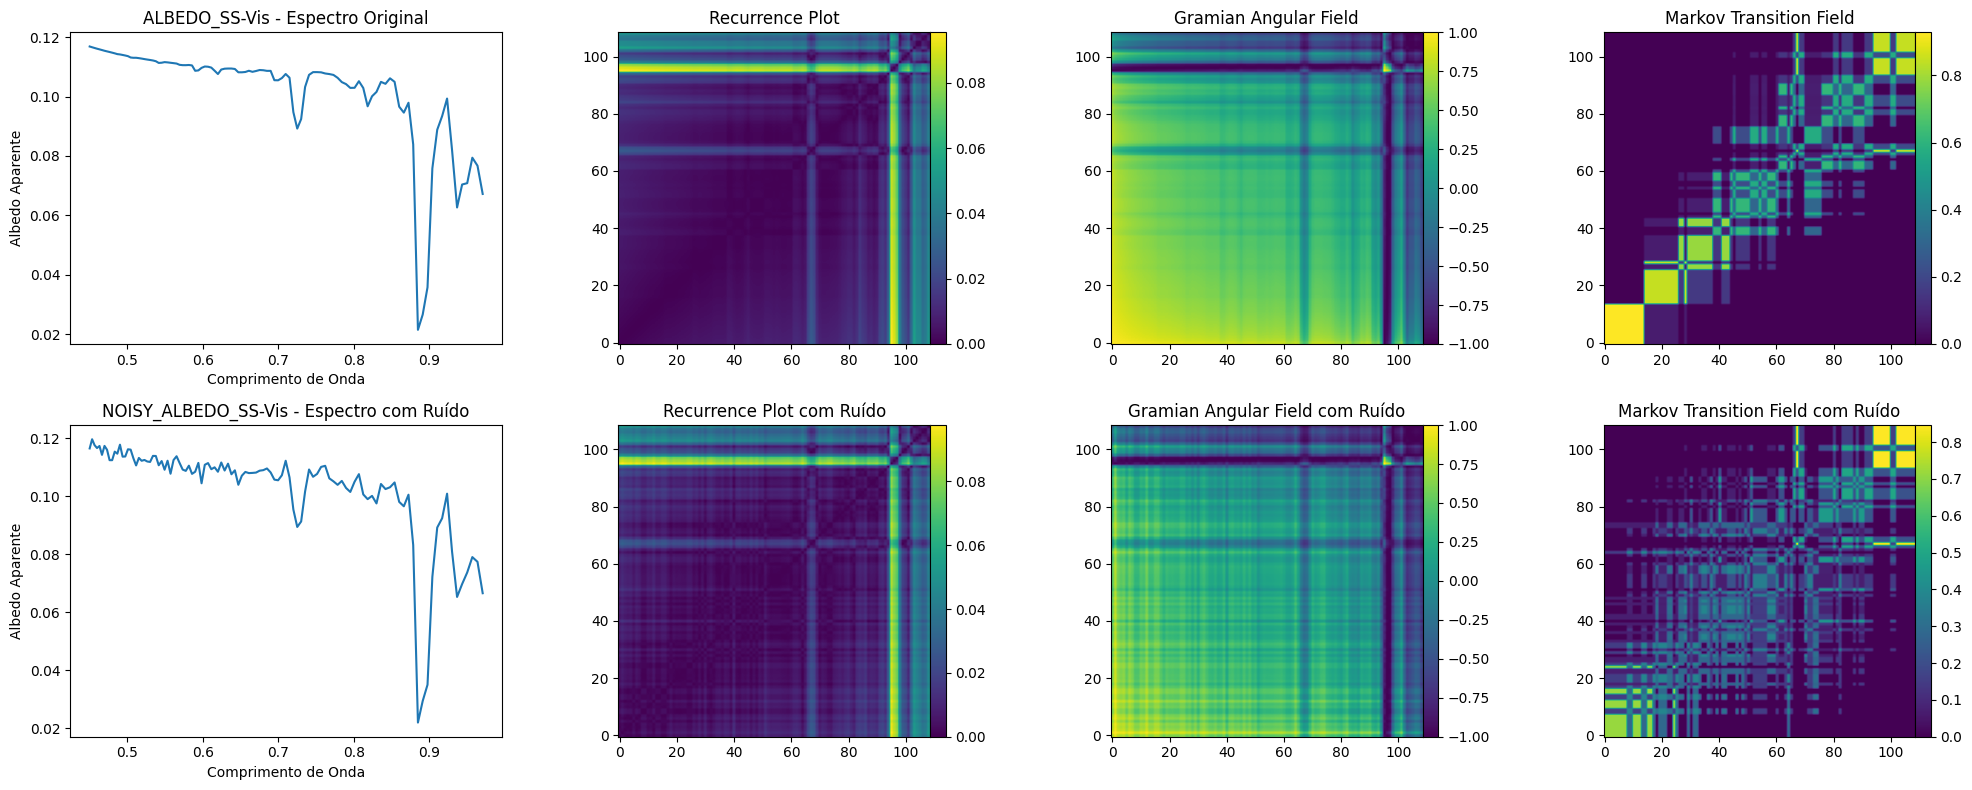

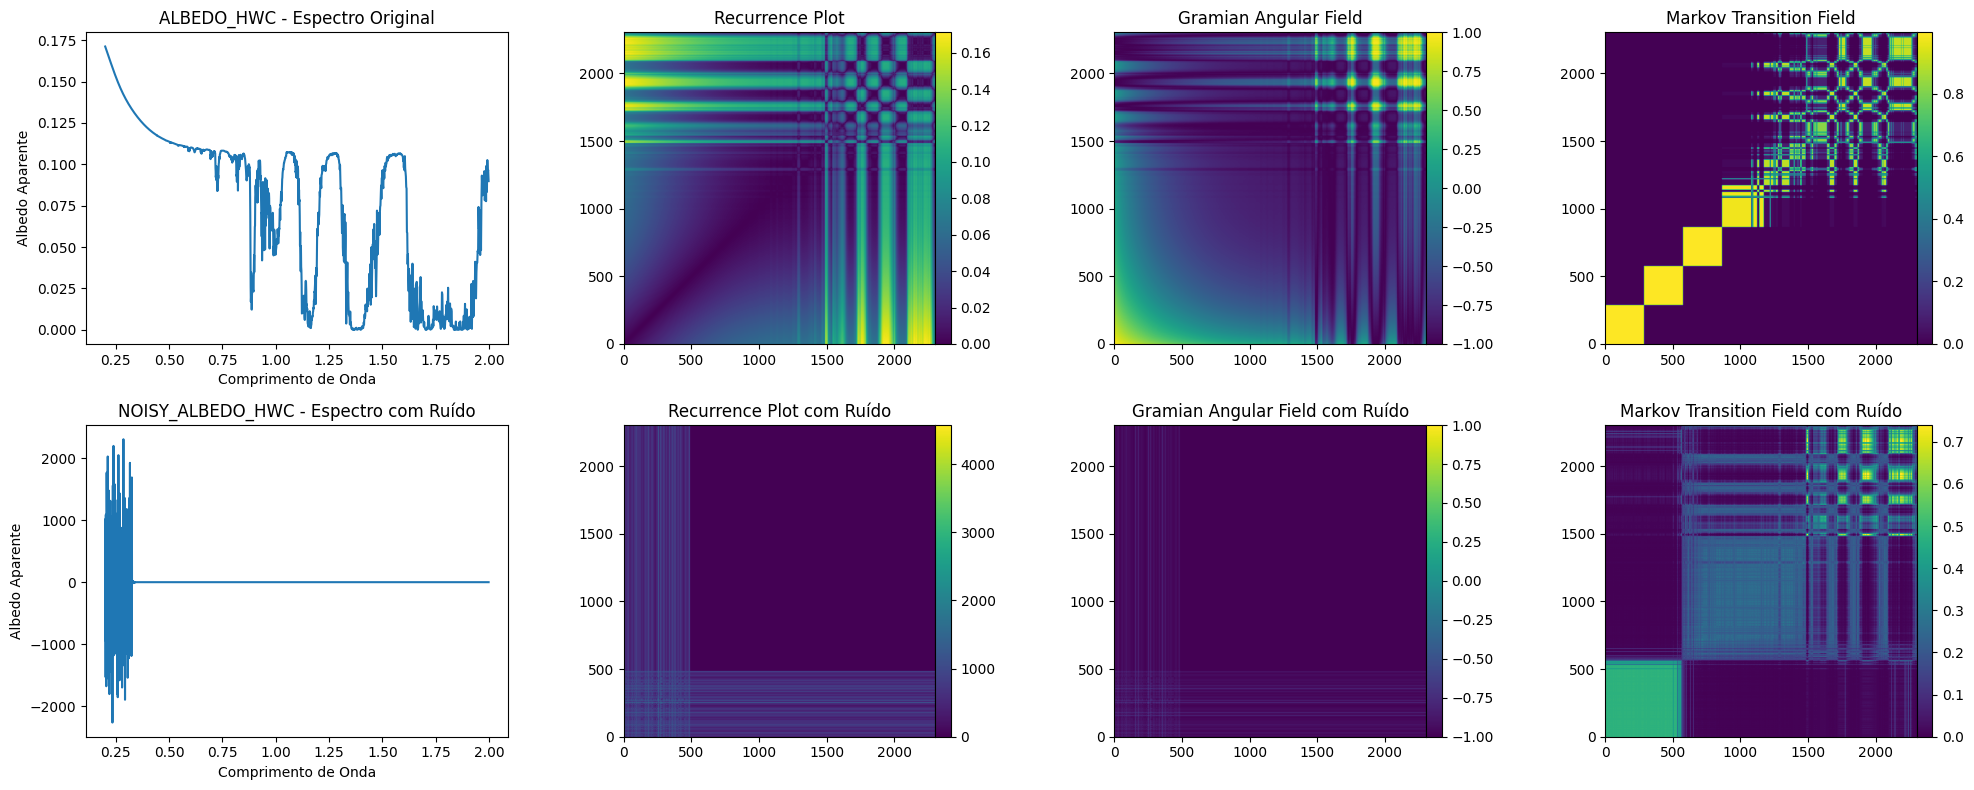

In [50]:
recurrence_plot = RecurrencePlot()
gramian_angular_field = GramianAngularField()
markov_transition_field = MarkovTransitionField()

indice = np.random.randint(len(dados["ALBEDO_SS-NIR"]))

faixas = [
    ('WAVELENGTH_SS-NIR', 'ALBEDO_SS-NIR', 'NOISY_ALBEDO_SS-NIR'),
    ('WAVELENGTH_SS-UV', 'ALBEDO_SS-UV', 'NOISY_ALBEDO_SS-UV'),
    ('WAVELENGTH_SS-Vis', 'ALBEDO_SS-Vis', 'NOISY_ALBEDO_SS-Vis'),
    ('WAVELENGTH_HWC', 'ALBEDO_HWC', 'NOISY_ALBEDO_HWC')
]

for comprimento_onda_key, albedo_key, albedo_ruidoso_key in faixas:
    comprimento_de_onda = dados[comprimento_onda_key][indice]
    albedo_original = dados[albedo_key][indice]
    albedo_ruidoso = dados[albedo_ruidoso_key][indice]

    # Transformações para o albedo original
    X_rp = recurrence_plot.transform([albedo_original])[0]
    X_gaf = gramian_angular_field.transform([albedo_original])[0]
    X_mtf = markov_transition_field.transform([albedo_original])[0]

    # Transformações para o albedo ruidoso
    X_rp_noise = recurrence_plot.transform([albedo_ruidoso])[0]
    X_gaf_noise = gramian_angular_field.transform([albedo_ruidoso])[0]
    X_mtf_noise = markov_transition_field.transform([albedo_ruidoso])[0]

    # Plotagem para o albedo sem ruído
    fig, axs = plt.subplots(2, 4, figsize=(20, 8))

    # Espectro Original
    axs[0, 0].plot(comprimento_de_onda, albedo_original)
    axs[0, 0].set_title(f"{albedo_key} - Espectro Original")
    axs[0, 0].set_xlabel("Comprimento de Onda")
    axs[0, 0].set_ylabel("Albedo Aparente")

    # Recurrence Plot
    im0 = axs[0, 1].imshow(X_rp, cmap='viridis', origin='lower')
    axs[0, 1].set_title("Recurrence Plot")
    fig.colorbar(im0, ax=axs[0, 1], pad=0)

    # Gramian Angular Field
    im1 = axs[0, 2].imshow(X_gaf, cmap='viridis', origin='lower')
    axs[0, 2].set_title("Gramian Angular Field")
    fig.colorbar(im1, ax=axs[0, 2], pad=0)

    # Markov Transition Field
    im2 = axs[0, 3].imshow(X_mtf, cmap='viridis', origin='lower')
    axs[0, 3].set_title("Markov Transition Field")
    fig.colorbar(im2, ax=axs[0, 3], pad=0)

    # Plotagem para o albedo com ruído
    axs[1, 0].plot(comprimento_de_onda, albedo_ruidoso)
    axs[1, 0].set_title(f"{albedo_ruidoso_key} - Espectro com Ruído")
    axs[1, 0].set_xlabel("Comprimento de Onda")
    axs[1, 0].set_ylabel("Albedo Aparente")

    # Recurrence Plot com ruído
    im3 = axs[1, 1].imshow(X_rp_noise, cmap='viridis', origin='lower')
    axs[1, 1].set_title("Recurrence Plot com Ruído")
    fig.colorbar(im3, ax=axs[1, 1], pad=0)

    # Gramian Angular Field com ruído
    im4 = axs[1, 2].imshow(X_gaf_noise, cmap='viridis', origin='lower')
    axs[1, 2].set_title("Gramian Angular Field com Ruído")
    fig.colorbar(im4, ax=axs[1, 2], pad=0)

    # Markov Transition Field com ruído
    im5 = axs[1, 3].imshow(X_mtf_noise, cmap='viridis', origin='lower')
    axs[1, 3].set_title("Markov Transition Field com Ruído")
    fig.colorbar(im5, ax=axs[1, 3], pad=0)

    plt.tight_layout()
    plt.show()